# The Capital Asset Pricing Model (CAPM)

**This notebook provides a comprehensive, hands-on demonstration of CAPM, blending financial theory with practical Python implementation.**

*Written by [Baumann Bence](https://hu.linkedin.com/in/bence-baumann-803aa0134) during the joys of FRM L1 preparation*

## Intro

Let's say Markowitz built the foundational building block of risk management with his contributions in the '50s. 
Economists William Sharpe*, John Lintner, and Jan Mossin furthered how risk should be viewed via advancing MPT throughout the 60's.

Specifically, CAPM popularised the idea of decomposing the total risk of an asset (which was treated as a standalone think by MPT)
onto two components:

 (1) systematic risk: risk of the 'market', and performance impact of Economy-wide shocks
 
 (2) risk unique to the asset: the 'rest' basically 

**Core idea of CAPM is that it leverages the idea of synthetically describing the group trough measurements of it's elements and vice versa.**

### Intuition

As I was drafting this notebook as I crunched my way trough the pages, along the way I realised that originally what CAPM considers the "market" represents a value-weighted portfolio of all investable assets, not a subset like US Equity market. I personally wouldn't mix and markets like Equity and FI by intuition, but I see where the idea of mixing oil and water comes from:

(1) Imagine that in the whole market there are only 3 homogenous asset you can swap your cash against, equity, FI, and commods, and every participants have either hold cash or commit capital against an asset. Let's ignore the complexity arising from multiple denominating currency and the performance resulting from FX Delta.

(2) Theoretically we can determine the risk of owning an asset against cash (denominating ccy) trough the weight based average risk of the assets, weighted by how much will is there to exchange cash against it gauged trough market price times the quantity in circulation of what $P_asset$ is being expressed in, let's ignore frictions.

(3) Imagine there's an equity market worth of 1.1bn ccy; a FI market worth of 2.2bn ccy; a commods market worth of 3.3bn ccy.

(4) The whole market is valued at 6.6bn ccy and assuming that 6.6bn is all the cash committed toward the very concept of owning assets.

Over time the market's performance against cash ($R_m$) can be rolled up from components via assigning weights ($w_i$) to the notional basis, just like in case of 'rolling up a dimension' when portfolio performance is being calculated from position level performance where notionals were aggregated on the price curves, and the portfolio's total exposure (sensitivity alternatively) to each curve have been expressed as ($w_i$).
$$
\text{Market's performance against cash} = 1/6 \cdot R_{fi} + 1/4 \cdot R_{eq} + 1/2 \cdot R_{comm}
$$


Than the relevant inherent risk gauge of concept of owning an asset against fiat is:
$$
\text{Total Risk of the Concept of owning an Asset} = \sigma_{assets} = 1/6 \cdot \sigma_{fi} + 1/4 \cdot \sigma_{eq} + 1/2 \cdot \sigma_{comm}
$$

**Where:**

$\sigma_{assets}$: **"sigma" (denoting variability/price risk) of the very concept of owning an asset opposing to holding cash is really the same as the risk of all the components weighted based on how much capital is being committed against opposing to picking cash. Mind you risk is measured in  valuation variability in price which is basically a ratio against cash.**


**$\sigma_{fi}$: perceived  price variability of fixed income against cash**

**$\sigma_{eq}$: perceived  price variability of equities' against cash**

**$\sigma_{comm}$: perceived  price variability of commodities against cash**

I purposefully thrown out inherent complexity arising from asset class correlation divergence from 1.0, as this is a key nuance in portfolio theory and CAPM, so if the above formula made perfect sense to you and you'd have believed to me, than please give this one a full read hehe. **So the above only stands if cross asset corr = 1.0 across the board.**

Though intra asset sub-class correlation is on the rise vs historical levels as many publication are pointing it out([just to pick one](https://www.financial-planning.com/news/what-a-study-of-correlations-reveals-about-diversification)), the covariances should be always considered to capture the diversification effect! Just as an interesting thought-play consider that intra asset group performance increase comes from mechanisms like:

- In many cases returns to an extent are being driven partially by belonging to a group through mechanisms like
sizable grouped trade flow through investing or divesting driving in ETFs increased correlation for the asset groups

- Or simply asset class applied valuation characteristics like valuation of assets via proxies. When the [US Govy Basis Trade Unwind hiked the curve](https://www.youtube.com/watch?v=-pe7fE57kLI) I assume most of the govys / corp bonds to a measurable extent dropped in value temporarily on the notion that many of these are priced / valued by quantified risk premiums for the characteristics (denominating ccy, CP risk...) + the risk free rate ($r_f$) for which the US govy is the applied proxy for many. As if some applied models proxy $r_f$ through the US govy curve's point representing the nearest thetas, the percieved fair yield on the instrument rises and (if) the disparity cross it's static offered rate for the period does not rise along (e.g. fixed or... anyway) along with the rise of the percieved $r_f$, the assumed fair price drops.

- Denominating currency (acting as the common divisor $P_i$ expressed in) value swings like the recent USD devaluation captured in [DXY](https://www.cnbc.com/2025/04/10/us-dollar-index-suffers-biggest-drop-since-2022-hits-new-low-for-the-year.html)

- And so on... 
 
So CAPM aim to draw the relation of the given market's return ($R_m$), expected return ($E(R_m$) inherent systematic risk ($\sigma_m$) via assigning relative weights ($w_i$) for the components (tradeable assets) based on their valuation against a common cash denominator like USD or EUR.
Than for individual assets the model attempts to capture the uniqueness via β (beta).

### Assumptions (where to look at if model performance gain is being sought)

The derivation of CAPM introduces various crucial assumptions some of which are being carried over from [MPT](https://www.investopedia.com/terms/m/modernportfoliotheory.asp).
I aim to outline them **properly**, and *plainly* as well as what I found is that if you can't express it simply you don't really understand the concept, but true intuition comes if you can craft really bad sarcastic jokes with it.

**So:**
- **Access to all information for all market participants freely, and it is being instantly absorved** <-  *bloomy is free and we ignore time if the topic is getting unconfortable around it*

- **All market participants have the same expectations** <- *of that they are perfectly rational, and they draw the same conclusions*

- **All participants base the investments on the mean and variance of returns** <- *normal distribution of returns is a given and everyone is a rockstar at volatility regime and price forecasts*

- **No frictions (txn cost, tax or else)** <- *brokers and exchanges are state owned and financed trough tax, but there is no tax, so the stakeholders are starving. The quality of the service is redundant, since the entities that matter unfrictions trough private, and...*

- **Allocations can be made in any partial amounts** <- *we ignore minimum trade size and increment constraints*

- **All participants can borrow and lend at a common risk free rate** <- *We ignore counterparty and ccy risk, and assume someone would pick the now jobless broker to lend to vs the United States of America's govy on the same promised return implying elevated willingness of charity, or taking on counterparty risk became a 1:1 tax (not basis!) deduction making the trade profitable since the probability of gains trough deduction (p=1.0) outpaces the p of default (p nears 1.0)*

- **Any individual investor's allocation decision cannot change the market prices**. <- *JP Morgan's [spoofing team](https://www.justice.gov/archives/opa/pr/former-jp-morgan-traders-convicted-fraud-attempted-price-manipulation-and-spoofing-multi-year) is out there seeking to take your job and dark pool hasn't been invented yet due to a lack of market interest*

# Math

To demonstrate the calculations, I sourced the closing share prices of the top 10 US companies ranked by market cap for a sequence of 20 business days. The lack of a time dimension in the dataset is not an issue, as you can leverage the list or array index as a proxy for time.

## The Systematic Return and Risk

Systematic risk can't be measured directly, think of it like trying to measure all the height gained (or lost) in a population over time. You can't simply show up with your measuring stick, place it next to the population, and observe the result. However, we can holistically express how it could be done by ignoring constraints and some real-world complexity in an idealized mathematical model, with some wild assumptions—like everyone straightening up at the same time when the measurement is being taken. This is similar to the pricing frequency and EOD (end-of-day) data timestamp comparability issue. Obviously, it's unrealistic to synchronize ~8 billion people to the exact moment of measurement.

What's actually doable is if you have individual measurements for every person you care about, exercised roughly at the same time, on the same day, and under similar conditions. Through the individual data, knowing your group's headcount $N$ (and concluding that sum of $w_N = 1$), and logically concluding that the group's height growth market's sensitivity to every persion is the same ($w_i = 1/N$), you are able to gauge the total group growth rate of your group ($R_m$) via taking the average of height gained nominally and multipying with the headcount. But if you'd like to express it from relative height gains ($R_I$) opposing to nomnal gains, the weight array should be revalued based on initial height's ratio to the group's total height --> $w_i = height_i / height_(group)$



**So CAPM's core idea is that the market can be decomposed ('rolled down') to asset level where risk and return can be quantified, and by weighting them based on a market share capture, we can construct the whole from the pieces ('roll up'). To 'roll down' you need a return sensitivity ratio against the group, let's call it "beta" - > β, while to 'roll up' you need a relevance measure captured trough $w_i$ for all components.**

**Beta's formula:**
$$\beta_i = \frac{\text{cov}(R_i, R_m)}{\sigma_m^2} = \rho_{i,m} \cdot \frac{\sigma_i}{\sigma_m} \tag{Eq. 0}$$

**Variables**:  
- $R_i$: Asset return  
- $R_m$: Market return  
- $\text{cov}(R_i, R_m)$: Covariance 
- $\sigma_m^2$: Market variance
- $\sigma_i$: Asset volatility  
- $\sigma_m$: Market volatility  
- $\rho_{i,m}$: Correlation  



**Below script computes daily $R_i$ and $\sigma_i$ for asset_i from plain hardcoded data**

In [10]:
import matplotlib.pyplot as plt #pack 4 nice plots that spare low level programming
#and a lot of math like vectorized thingys

import pandas as pd#ESG statement, obviously

import numpy as np#standard getting mathsy pack outside of the industry, as when you actually work at BB you'll face 
#the dread of non-dependence  risk mitigation via internal solutions as some idealistic head bloke from risk dreamt - so the privilaged ones elaborate

#to simplify and enable gaugeability(is this a word?) I aimed to base the calys on a quite finite basis -> let's imagine there's just 10 assets on the whole market

#dict is kinda like lists with a key I'm just picking up now. I kinda aimed to practice 'em. might overleveraged as I could've leverage simply lists
#with indexation consistently aligned to information basis it describes and leverage curve tickers as a naming convention

# as I gather dicts are labeled shelves like colours = {'Apple': 'red','Sky': 'blue', 'Grass': 'green'}
# while lists shouldn't be logically tied to a key like -> set_1_s_colours:list = ['red', blue', 'green']
# but asset_i = [ R_i, corr(R_i, R_m), sigma_i, sum(R_i),, beta_i, "proper_name_i" ] could be sane as well just like a pixel described as
# pixel_i = [x, y, red, green, blue] opposing to
# cordinates = [x, y] red_green_blue = [float, float, float] 

prices:dict = {
    #in USD; 'Closing' P sourced from Yahoo API; ordered and count(P_i,t) == 20 for all i (asset) Prod lvl code should include an array
    #of robustness checks and threatment of special cases, and build solutions for example for cross ccy threatments 
    #in real word solutions, but what I realised working in finance that concepts should be taught and explained in their kinda pure form
    #and greqatness comes from crossing pure concepts. For those for which this is unintuitive after a serious comitted time on the field 
    #elevated conceptual complexity is just building a false sense of confidence if the corresponding bar (exam or interview) is somehow cleared
                #consequently adding a time dimension is redundant as we can threat the placement in the list as t.
    "AAPL": [200.85, 201.70, 203.27, 202.82, 200.63, 203.92, 201.45, 202.67, 198.78, 199.20, 196.45, 198.42, 195.64, 196.58, 201.00, 201.50, 200.30, 201.56, 201.00, 201.08],
    "MSFT": [460.36, 461.97, 462.97, 463.87, 467.68, 470.38, 472.75, 470.92, 472.62, 478.87, 474.96, 479.14, 478.04, 480.24, 477.40, 486.00, 490.11, 492.27, 497.45, 495.94],
    "NVDA": [135.12, 137.37, 141.21, 141.91, 139.98, 141.71, 142.62, 143.95, 142.83, 145.00, 141.97, 144.69, 144.12, 145.48, 143.85, 144.17, 147.90, 154.31, 155.02, 157.75],
    "GOOGL": [171.53, 168.83, 165.98, 167.85, 168.01, 173.47, 176.09, 178.60, 177.35, 175.70, 174.67, 176.77, 175.95, 173.32, 166.64, 165.19, 166.77, 170.68, 173.54, 178.53],
    "AMZN": [205.01, 206.65, 205.71, 207.23, 207.91, 213.57, 216.98, 217.61, 213.20, 213.24, 212.10, 216.10, 214.82, 212.52, 209.69, 208.47, 212.77, 211.99, 217.12, 223.30],
    "META": [646.99, 670.38, 666.34, 687.42, 684.09, 697.17, 693.53, 701.86, 693.61, 692.83, 682.34, 702.12, 697.23, 695.77, 682.35, 698.53, 712.20, 708.68, 726.09, 733.63],
    "TSLA": [346.46, 342.69, 344.27, 332.05, 284.70, 295.14, 308.58, 326.09, 326.43, 319.11, 325.31, 329.13, 316.35, 322.05, 322.16, 348.68, 340.47, 327.55, 325.78, 323.63],
    "BRK-B": [503.96, 502.81, 497.83, 491.00, 488.74, 493.53, 493.33, 491.13, 488.14, 490.34, 487.54, 490.23, 483.48, 485.14, 484.85, 487.77, 493.48, 486.21, 485.05, 485.68],
    "AVGO": [241.50, 248.13, 256.25, 260.47, 259.32, 246.35, 243.71, 244.06, 252.32, 255.47, 248.12, 251.51, 248.78, 250.67, 249.99, 253.77, 263.77, 264.65, 270.17, 269.35],
    "WMT": [98.72, 99.77, 99.98, 99.35, 97.96, 97.47, 97.45, 97.32, 95.80, 94.83, 94.44, 94.29, 94.25, 95.09, 96.12, 97.87, 98.00, 97.26, 96.02, 97.27],
}

def return_calc(tickers_list: list, price_dict: dict):#function definition
    """Calculate daily returns for given tickers"""#kind of function title
    returns_dict = {}#declaration of variable, habit of learing the basics on Programming 1 based on C during trying EE
    for asset in tickers_list:#comfy while
        asset_prices = price_dict[asset]#pass key=asset to price_dict[] and assign the curve to temp variable asset_prices; key looped
        daily_returns = []# C?
        for i in range(1, len(asset_prices)):#same as for i in range asset_prices, but jumping to index = 1 as ..in prices would append a valuation P=0 vs P=20
            daily_return = (asset_prices[i] - asset_prices[i-1]) / asset_prices[i-1]
            daily_returns.append(daily_return)#tempvar assign
        returns_dict[asset] = daily_returns#returnstream assigned to key in for loop (asset) 
    return returns_dict#what the function passes, based on the inputs

tickers = list(prices.keys())#usually gonna iterate trough this in fors when I want to do any drill on all assets
returns_dly = return_calc(tickers, prices)  # Now works correctly

# Market capitalizations (in trillions) from whichever model Perpexity applied; as of ~'25 06
valuations = {        # P * Q basically to gauge market valuation and relative share 
    'AAPL': 3.572,    # Apple
    'MSFT': 3.085,    # Microsoft
    'NVDA': 3.052,    # NVIDIA
    'GOOGL': 2.468,   # Alphabet (Google)
    'AMZN': 2.467,    # Amazon
    'META': 1.740,    # Meta Platforms
    'TSLA': 1.287,    # Tesla
    'BRK-B': 1.018,   # Berkshire Hathaway
    'AVGO': 1.010,    # Broadcom
    'WMT': 0.79249    # Walmart
}



# Calculate standard deviations
std_devs: dict = {asset: np.std(returns_dly[asset], ddof=1) for asset in tickers}
#for i in tickers:#<- remove the rest of #'s for eye candy
    #print(f"{i}'s std is {std_devs[i]}")

## Describing the market portfolio: $R_m$ and $\sigma_m$

**So we have the following dictionary variables storing:**
- **returns_dly**     <- $R_i$ (Asset return over theta increment of observations)
- **std_devs**    <- $\sigma_i$ (Asset return volatility) measured trough std. dev. of daily $R_i$ with a [degree of freedom (ddof)](https://www.investopedia.com/terms/d/degrees-of-freedom.asp) = 1 as per with a truly holistic case we'd need to utilise ddof=0, keem in mind the quite limited sample size I hardcoded

Trough the valuations of assets $MV_i$ (Market Value) we can determine $R_m$ with the intuitive approach of **Market return ($R_m$)** 

   $$
   R_m = \sum_{i=1}^{n} w_i R_i
   $$  
   where $w_i = \frac{MV_i}{\sum_{j=1}^{n} MV_j}$ (market-value weight of asset $i$) 

Hassle of acquisition of low dimensional data for rolling up a dimension in grouping until we reach what we call 'market' can be avoided in practice by good enough proxies like SP500 perf, and RUSSELL2K perf for equities, than after a good enough (total MV in ccy) market share estimation simply doing the drill for those 2. Continue for all asset class until you have them described, than proceed to do the same cross asset classes and voilà! Keep in mind to express the performance ($R_i$) against the same ccy, and synchronise the described timeframes, as per if DXY falls sharply, from an USD denominated viewpoint assets may increase in value across the board, while from an EUR viewpoint price (and inherently performance) may stagnate.

### Market Volatility Calculation via dimensional roll up from elements: Mind your cov()

 **tl;dr - you can rationalise / memorise / accept:** $$\sigma_m^2 = \sum_{i=1}^N x_i \mathrm{Cov}(R_i, R_m)$$ **and carry on, above should be sufficient for CAMP understanding, but some math revision doesn't hurt. Takeaway is that we weighted average the covariances(asset, rest) in case of risks and not the asset's risk metrics, that's all.**

 **Even better if $R_m$ evolution over time is known you can call it a day and directly calculate $\sigma_m$ trough =stdev.p($R_m$) in excel or the following in math:**

$$
 \sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 } \tag{Eq. 1}
$$

 **which is literally just calculating the standard population deviance (ddof=0) of the market return, nothing fancy.**


### Here’s a step-by-step explanation of why the weighted sum of covariances between each asset and the market equals the market variance:

So the Weighted Sum of asset Variance != Market Variance <- since it misses on risk reduction via diversification

If $R_m$ could be directly gauged:
$$
\sigma_m^2 = \mathrm{Var}(R_m) \tag{Eq. 2}
$$
Either you can spend big on data availability and computing power, or let providers like MSCI do the drill and progy it trough indices like the weighted benchmark of S&P500 and Russel2k in case of EQs and similars, you get the idea. Nevertheless..




For a portfolio (market) with weights if trough $x_i$ we introduce 1 level of complexity for each asset $i$, the variance of the market return can be expressed in normie frightening form as:

$$
\sigma_m^2 = \mathrm{Var}(R_m) = \mathrm{Var}\left(\sum_{i=1}^N x_i R_i\right) \tag{Eq. 3}
$$





Expanding this:
$$
\sigma_m^2 = \sum_{i=1}^N \sum_{j=1}^N w_i w_j \mathrm{Cov}(R_i, R_j) = \mathbf{w}^\top \Sigma \mathbf{w} \tag{Eq. 4}
$$

Or we can alter the side we take the square root:

$$
\sigma_m = \sqrt{\mathbf{w}^\top \Sigma \mathbf{w}} \tag{Eq. 5}
$$

Just added the matrix form which cool kids use which is is simply a compact, linear algebra representation of the double sum of two iterative element which will be leveraged in sigma_m = np.sqrt(weights_array.T @ cov_matrix.values @ weights_array)


But the introduction of covariance of asset $i$ with the market is,the limit where I stop saying formulas are just mathsy expression of simple steps, just take a deep breath:
$$
\mathrm{Cov}(R_i, R_m) = \mathrm{Cov}\left(R_i, \sum_{j=1}^N x_j R_j\right) = \sum_{j=1}^N x_j \mathrm{Cov}(R_i, R_j) \tag{Eq. 6}
$$



So, if you weight each asset’s covariance with the market by its market weight and sum you reach the proof I think,  $\sigma_m^2$ from the sum of $x_i$ (asset weight) times cov($R_I$ against $R_m$):
$$
\sum_{i=1}^N x_i \mathrm{Cov}(R_i, R_m) = \sum_{i=1}^N x_i \left( \sum_{j=1}^N x_j \mathrm{Cov}(R_i, R_j) \right) = \sum_{i=1}^N \sum_{j=1}^N x_i x_j \mathrm{Cov}(R_i, R_j) \tag{Eq. 7}
$$



This is exactly the formula for the variance ($\sigma ^2$) of the market return, so we are surely empowered to outline the formula what the source material cooks with:

$$
\sigma_m^2 = \sum_{i=1}^N x_i \mathrm{Cov}(R_i, R_m) \tag{Eq. 8}
$$

An asset's contributiion to the overall risk of the market portfilio is given by the ratio of the covariance of the rates of return for the asset and the market portfolio(i.e., the numerator)tp tje varoamce pf tje ,arlet őprtfolio's rate of return (i.e. the denominator). Note that the weighted sum cross all covariances = $\sigma_m^2$ -- i.e. the market portfolio's total risk.

$$
\sigma_m^2 = \sum_{i=1}^N x_i\, \mathrm{Cov}(R_i, R_m) \tag{Eq. 9}
$$

In equation 9, each asset's relative weight is goven by $i_i$, N is the total number of assets in the market portfolio, and 
$$
\sum_{i=1}^N x_i = 1 
$$
Starting with Equation 8, dividing both sides by $\sigma_m^2$ , and using the definition of $\beta$ in Equation 0., the following result may be drawn:
$$
\sum_{i=1}^N x_i * \beta_i = 1 
$$

### Intuitive Explanation

**At it's core it builds on the same intuitive approach of impact weighted average of retuns, but opposing to weighted averageing the volatilitymeasures ( $\sigma_i$ ) directly, the averageing should be derived from the covariance of $\sigma_i$ against $\sigma_m$ where $w_i$ is it's share of the market.**

So, the market variance is the sum of each asset’s contribution to market risk can be constructed by it's covariance with the market and its weight.
Consider that assets are not perfectly correlated,henceforth their joint movements (covariances) matter. If you only summed weighted variances, you’d ignore diversification effects and double-count risk. The covariance structure ensures you capture how assets move together, not just individually.

Connection to Correlation is that since covariance can be written as:
$$
\mathrm{Cov}(R_i, R_m) = \rho_{i,m} \, \sigma_i \sigma_m 
$$


you can also express the sum in terms of correlations, but the key insight is that the sum of the weighted covariances equals the market variance.






### Python implementation:

Eq. 1 (Population std) ddof = 0: 0.008136768755649122
Eq. 1.2 (Population std) ddof = 1: 0.008359735209373984
Eq. 2/3 (Sample variance): 6.98851727708471e-05
Eq. 4 (Portfolio variance, matrix): 6.988517277084708e-05
Eq. 5 (Portfolio volatility, matrix): 0.008359735209373984


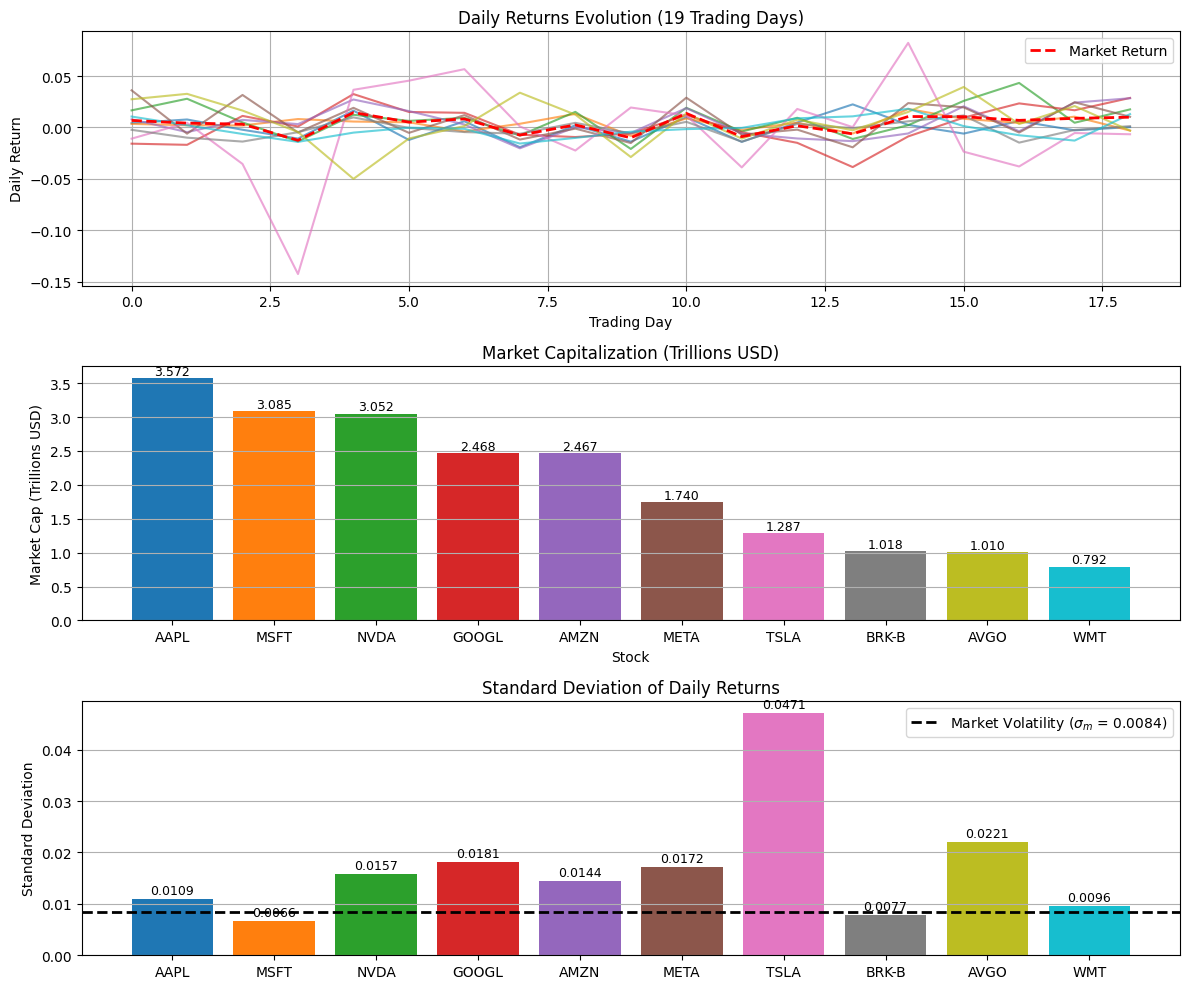

In [11]:
# Calculate total market valuation
total_valuation = sum(valuations.values())

# Create consistent color mapping dict {key=tickers; color_value} which we can leverage across plots
colors = plt.cm.tab10.colors
color_map = {stock: colors[i] for i, stock in enumerate(tickers)}

# Calculate weights for each asset
weights = {k: v / total_valuation for k, v in valuations.items()}

# Convert daily returns to DataFrame
returns_df = pd.DataFrame(returns_dly)

# Calculate market return R_m as weighted sum of asset returns
R_m = (returns_df * pd.Series(weights)).sum(axis=1).tolist()

# Calculate covariance matrix of asset returns
cov_matrix = returns_df.cov()

# Convert weights to numpy array in correct order
weights_array = np.array([weights[asset] for asset in returns_df.columns])

# Calculate market volatility sigma_m
sigma_m_1 = np.sqrt(weights_array.T @ cov_matrix.values @ weights_array) 
sigma_m_2 = np.std(R_m, ddof=1)  

# Eq. 1: Population std (Excel STDEV.P)
sigma_m_pop = np.std(
    R_m,#basis
    ddof=0#explicit pass as the function presets to ddof=1
                    )
sigma_m_pop_v2 = np.std(
    R_m,#basis
    ddof=1
                    )
# Eq. 2 & 3: Sample variance of market return
var_Rm = np.var(R_m, ddof=1)
# Eq. 4: Portfolio variance/std_dev (matrix form)
sigma_m_1 = np.sqrt(weights_array.T @ cov_matrix.values @ weights_array)
# Eq. 5: Portfolio volatility (matrix form, already computed above)^2

print("Eq. 1 (Population std) ddof = 0:", sigma_m_pop)
print("Eq. 1.2 (Population std) ddof = 1:", sigma_m_pop_v2)
print("Eq. 2/3 (Sample variance):", var_Rm)
print("Eq. 4 (Portfolio variance, matrix):", sigma_m_1**2)
print("Eq. 5 (Portfolio volatility, matrix):", sigma_m_1)



# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Returns evolution with market return highlighted
for asset in tickers:
    ax1.plot(returns_dly[asset],#datasource
             color=color_map[asset],#calling the colour palette
             alpha=0.65)  # Alpha = opacity factor
ax1.plot(R_m, color='red', linewidth=2, linestyle='--', label='Market Return')#Highlighted market return
ax1.set_title('Daily Returns Evolution (19 Trading Days)')
ax1.set_xlabel('Trading Day')
ax1.set_ylabel('Daily Return')
ax1.legend(loc='best')  # Add legend for market return
ax1.grid(True)

# Plot 2: Market capitalization
market_caps = valuations  # Align variable names
market_caps_sorted = sorted(market_caps.items(), key=lambda x: x[1], reverse=True)
sorted_stocks = [item[0] for item in market_caps_sorted]
sorted_caps = [item[1] for item in market_caps_sorted]
ax2.bar(sorted_stocks, sorted_caps, color=[color_map[stock] for stock in sorted_stocks])
ax2.set_title('Market Capitalization (Trillions USD)')
ax2.set_xlabel('Stock')
ax2.set_ylabel('Market Cap (Trillions USD)')
ax2.grid(axis='y')

# Add value labels to bars
for i, v in enumerate(sorted_caps):
    ax2.text(i, v + 0.05, f'{v:.3f}', ha='center', fontsize=9)

# Plot 3: Standard deviations with market volatility line, ordered by Market Cap
std_devs_by_cap = [std_devs[stock] for stock in sorted_stocks]
ax3.bar(sorted_stocks, std_devs_by_cap, color=[color_map[stock] for stock in sorted_stocks])
ax3.axhline(y=sigma_m_1, color='black', linestyle='--', linewidth=2, 
            label=f'Market Volatility ($\\sigma_m$ = {sigma_m_1:.4f})')
ax3.set_title('Standard Deviation of Daily Returns')
ax3.set_ylabel('Standard Deviation')
ax3.grid(axis='y')
ax3.legend(loc='best')

# Add value labels to bars
for i, v in enumerate(std_devs_by_cap):
    ax3.text(i, v + 0.001, f'{v:.4f}', ha='center', fontsize=9)


plt.tight_layout()
plt.show()
n = 0
#for i in tickers:
 #   print(i)
  #  print(weights_array[n])
   # n += 1


## Pre requisites cleared to determine $\beta_i $:  

**returns_dly:** dict of asset returns 

**std_devs:** dict of asset volatilities 

**R_m:** list or array of market returns

**sigma_m:** float, market volatility 

**weights_array:** relevance gauge of the market we strive to proxy
    


Now we are all set to calculate $\beta_i $ and assign the values to assets. Below script use the covariance based definition of:
$$
\beta_i = \frac{\mathrm{Cov}(R_i, R_m)}{\sigma_m^2} 
$$
As well the correlation based approach:
$$
\beta_i = \rho_{i,m} \cdot \frac{\sigma_i}{\sigma_m}
$$
Note that Beta values (β = 1 indicates market-level risk, β > 1 indicates higher systematic risk, etc.)
Just for 

And we have $x_i$ stored in weights_array(orfer aligns to tickers) and in the corr() based definition of $\beta_i$ 

                         
$
\sum_{i=1}^N x_i = 1
$

Below is a quick sanity check to verify the above.

In [12]:
if sum(weights_array) == 1.00:
    print("Sum of w_i is 1.00, we are fine")
else:
    print("Sanity check, something's off, sum of w_i != 1.00")

Sum of w_i is 1.00, we are fine


In [13]:
# Convert market return to numpy array for calculations
R_m_array = np.array(R_m)

# Initialize dictionary to store betas
beta_i = {}

R_m_array = np.array(R_m)

print("Asset    | beta (cov)   | beta (corr)")
print("---------------------------------------")
for asset, asset_returns in returns_dly.items():
    asset_array = np.array(asset_returns)
    # Covariance-based beta
    cov = np.cov(asset_array, R_m_array, ddof=1)[0, 1] 
    beta_cov = cov / (sigma_m_1 ** 2) # b_i = cov(r_i, r_m) / VAR(market volatility)
    # Correlation-based beta
    corr = np.corrcoef(asset_array, R_m_array)[0, 1]
    beta_corr = corr * (std_devs[asset] / sigma_m_1) #b_i = p_i,m * sigma_i / sigma_m
    # print on terminal
    print(f"{asset:8} | {beta_cov:11.4f} | {beta_corr:11.4f}")
    # assignment into beta_i = {} as beta_cov and beta_corr are just temp vars
    beta_i[asset] = beta_cov


Asset    | beta (cov)   | beta (corr)
---------------------------------------
AAPL     |      0.6449 |      0.6449
MSFT     |      0.3318 |      0.3318
NVDA     |      1.3476 |      1.3476
GOOGL    |      1.1841 |      1.1841
AMZN     |      1.1482 |      1.1482
META     |      1.4892 |      1.4892
TSLA     |      2.8155 |      2.8155
BRK-B    |      0.4576 |      0.4576
AVGO     |      0.3403 |      0.3403
WMT      |      0.3431 |      0.3431


## Finding $E(R_i)$

**Consider that from an investor's perspective, beta represents the portion of an asset's total risk that cannot be diversified away and which investors will expect compensation. To put more simpy, higher the beta, higher the systematic risk (and therfore the expected rate of return).**

**There are two caveat  to take!**
 - CAPM considers only diversification trough market representative exposrue basically! Beta does not measure total risk, only the part that is       correlated with the market (systematic risk). Unsystematic (idiosyncratic) risk can be diversified away and is not compensated in equilibrium. In practice, it is possible to construct portfolios (using the [Efficient Frontier](https://corporatefinanceinstitute.com/resources/career-map/sell-side/capital-markets/efficient-frontier/) from Modern Portfolio Theory for example) that have lower risk than the market for a given level of expected return, or higher return for a given level of risk. CAPM simplifies this by assuming all investors hold the same market portfolio, but real-world allocations can be more efficient, especially with constraints or superior information

- Keep in mind that $\beta_i$ is unlevered, meaning $\beta_i$ neither considers the cost of leverage in case of a CFD position, or the viewpoint's (company / investor) debt. In other words, the unlevered beta removes the financial effect of leverage. Relationship between levered and unlevered beta can be explressed mathematically as:
$$
\text{Unlevered } \beta_i = \frac{\text{Levered (equity) } \beta_i}{1 + (1 - \text{Tax Rate}) \left( \frac{\text{Debt}}{\text{Equity}} \right)}
$$

Nevertheless, knowing $\beta_i$ we can express the expected return of asset $i$ over a given holding period determined by the horizon of $R_m$ as:

$$
E(R_i) = r + [\beta_iE(R_m) - r]
$$

Here $E(R_i)$ is the expected return of asset $i$ over the holding period, and $r$ is the expected ['riskless' rate of return](https://www.investopedia.com/terms/r/risk-freerate.asp) of the imaginary (*by construct*) or real asset we consider riskless like T-Bills. Instantly accepting $r_f$ of a horizon = $r$ of the closest horizon from the US govy yield curve is getting more and more unrealistic as the market percieved risks assoviated with both the denominating ccy; USD is increasing (think about the elevated DXY volatility in '25 Q1 and Q2) or the yield increasingly painful auctions due to drying liquidity on them that as of the writing of this note the Govy try to short-term cure via liquidity increase trough [SLR](https://www.financialresearch.gov/the-ofr-blog/2024/08/02/banks-supplementary-leverage-ratio/) reduction. For a EU investor operating in EU a german govy proxy could work better than US govy's syntheric EUR rate synthesized via perieved ccy valuation expactations derived from the derivs market

Therfore $[\beta_iE(R_m) - r]$ is the expected return premium above percieved the risk-free rate (as requited by investors according to CAPM). 

Note that $E(R_m)$ represents return the portfolio of all risky assets on the market while as I expressed multiple times, a 'broad enough' index's data from a decent vendor like MSCI (mind you costs can be mental, many cost $5-10K for a year!!!). Note that broadness is subjective and there continuest to be a debate among both academics and practicioners, and usually the absolute best answer is '*It depends...*'. For an updated empirical estimation of the market risk prelima of different countries, see the website of [Prof Aswath Damodaran](https://www.youtube.com/watch?v=Z5chrxMuBoo) --> http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html

The approach of mixing in $r$ against the estimated returns is coming from the approach regarding industry level P&L calculation for example a trading desk's P&L considers the cost of capital in use via treasury charges which is being faced against deals on position level. So kind of only recognising performance that is generated on top of actual funding costs for the activity, but I'm largely oversimplifying here. On the same notion, estimated financial result of an activity should be viewed against the risk free return (or actual funding cost) to kind of isolate the expected reward that can be evaluated against the risks undertaken by engageing the activity. So if my inflation adjusted ([kind of... DKJ + 1-1.5%, quarterly basis sampling for next QQ](https://www.allampapir.hu/allampapirok/BMAP)) Hungarian govy promises annualised return of ~15% based on expectations around SOY '23, than if a risky alternative capital allocation promises ~18% return than the risks should be evaluated as if *"3% promised return matches or outpaces the risks I undertake?"*

Anyway, below script sets the annualised risk free rate to 6% and expresses it in business day terms. Mind you I purpousefully ignored the complexity arising from return realisation frequency per year. You know, as if $S_0$ = 1.00 $r$=100%, payout frequency = 1 than $S_1$ = 2.00, and as we increase the payout frequency towards infinity we get a better and better estimation of [Euler's number basically](https://en.wikipedia.org/wiki/E_(mathematical_constant)) as $S_1$ becomes 2.71828... ceteris paribus -- $S_0$ and $r$ unchanged and we allow and theoretise instant reinvestment on the same rate and there is no friction so on...)

In [14]:
msg_1 = "Average return of market for a theta increment for the theta window -> "
avg_return_market = sum(R_m) / len(R_m)
print(msg_1 + str(avg_return_market) + " or " + str(round(avg_return_market * 100, 4)) + "% per business day")

annualised_risk_free_rate_same_ccy = 0.06 # 6%/year just made this up. Always use same ccy as E(R_i) expressed in
#since you reall don't want to compare turkish govy r i lira vs E(R_i) of a US corp bond mate

#usual bond daycount convention's divisor is a trap of theta misalignment as for sourceing the prices I used
#a lookback of 20 bizdays so the politically correct window to apply is: rate * 20 bizdays / 260 <- which is the avg bizday count
#usual bond conventions at -> https://www.investopedia.com/terms/d/daycount.asp
#mind you there are many more fancy ones but usually knowing 30/360 vs Actual/Actual is sufficient

#calc itself
r_f_per_theta_roll = (1 + annualised_risk_free_rate_same_ccy) ** (1/260) - 1

msg_2 = "Risk free return for theta increment for example calculation -> "
print(msg_2 + str(r_f_per_theta_roll) + " or " + str(round(r_f_per_theta_roll, 4)) + "% per business day")


Average return of market for a theta increment for the theta window -> 0.003268587156000535 or 0.3269% per business day
Risk free return for theta increment for example calculation -> 0.00022413629988005113 or 0.0002% per business day


$$
E(R_i) = r + [\beta_iE(R_m) - r]
$$

In [15]:
E_R_i = {} #declare dict to house for expected return of assets
E_rp_i = {} #declare dict to house for expected return premium of assets over risk free rate
E_R_m = avg_return_market #simply estimated market return = observed market return history. Expected (biz)daily market return
r = r_f_per_theta_roll #r over 1 bizday; let's ignore weekend s makeing monday's r = 3*r_f_per_theta_roll and similar complexities
#industry level applications should consider. There's a reason why some quants earn mental wages IMO...


print("Asset | Expected Return | Risk Premium | Std Dev (Risk)")
for asset in tickers:#loops trough the elements in list tickers
    key = asset#calling the ticker like 'AAPL' onto a temp var we gonna use as key for assignment to E_R_i dict
    B_i_asset = beta_i[asset]#assign beta to temp from dict of beta_i s
    E_r_i_temp = r + (B_i_asset * E_R_m - r)
    r_over_r_free = E_r_i_temp - r #alternatively B_i_asset * E_R_m 
    E_R_i[asset] = E_r_i_temp #assign the result of 
    E_rp_i[asset] = r_over_r_free
    sigma_i = std_devs[asset]
    print(f"{asset:8} | {E_r_i_temp:15.4%} | {r_over_r_free:12.4%} | {sigma_i:14.4}")

from scipy.stats import norm#for norm dist density function prob = 1 - norm.cdf((r_f_per_theta_roll - mu) / sigma)
#https://www.tutorialspoint.com/scipy/scipy_stats_norm_cdf_function.htm

print("\nInterpretation (assuming normal distribution):\n")

for asset in tickers:
    mu = E_R_i[asset]
    sigma = std_devs[asset]
    print(f"{asset} is expected to yield {round(mu * 100, 4)}% over a business day.")
    devs_list = [2, 3]
    for stddev in devs_list:
        lower_bound = mu - sigma * stddev
        upper_bound = mu + sigma * stddev
        if stddev == 2:
            conf = "68.2%"#mean-1 to +1 stdev density
        elif stddev == 3:
            conf = "95.4%"#mean-2 to +2 stdev density
        print(f"  - Realized return is expected to be between {round(lower_bound*100, 4)}% and {round(upper_bound*100, 4)}% with ~{conf} confidence.")
    # Probability that return > risk-free rate
    prob = 1 - norm.cdf((r - mu) / sigma)
    #asset_rp = E_rp_i[asset]
    print(f"  Probability to outpace the risk-free return: {prob:.2%} with an expected risk premium of {E_rp_i[asset]:.2%}")    
    
print("\n")
print("Metrics in output based on expected return and risk estimated based on a historical sample of 19 daily returns,")
print("and returns following normal distribution was assumed.")

Asset | Expected Return | Risk Premium | Std Dev (Risk)
AAPL     |         0.2108% |      0.1884% |        0.01088
MSFT     |         0.1085% |      0.0860% |       0.006645
NVDA     |         0.4405% |      0.4181% |        0.01572
GOOGL    |         0.3870% |      0.3646% |        0.01814
AMZN     |         0.3753% |      0.3529% |        0.01442
META     |         0.4867% |      0.4643% |        0.01724
TSLA     |         0.9203% |      0.8979% |        0.04711
BRK-B    |         0.1496% |      0.1271% |       0.007743
AVGO     |         0.1112% |      0.0888% |        0.02209
WMT      |         0.1121% |      0.0897% |       0.009588

Interpretation (assuming normal distribution):

AAPL is expected to yield 0.2108% over a business day.
  - Realized return is expected to be between -1.9649% and 2.3865% with ~68.2% confidence.
  - Realized return is expected to be between -3.0527% and 3.4743% with ~95.4% confidence.
  Probability to outpace the risk-free return: 56.87% with an expect

### What you should consider before practical implementation

**Expand Dataset:** Use at least 3-5 years of daily data or 5+ years of monthly data for more reliable estimates.

**Broader Market Proxy:** Consider using a comprehensive market index (S&P 500, total market index) rather than individual stocks.

**Include proper Risk-Free Rate uppon the snapshot:** Implement the complete CAPM framework with Treasury bill rates as the risk-free asset.

**Add Statistical Tests:** Include confidence intervals for beta estimates and statistical significance tests.

**Address Data Quality:** Use properly adjusted price data from financial databases rather than hardcoded values.

**And so on... The key takeaway is that the endless room for improvement in $E(R)$ and $E(\sigma)$ forecast and one by one adressing every assumption of the CAPM model detailed at the start but with every inch of introduced complexity consider if the increased cost or complexity is worth the hassle, e.g. measure the performance of the model, did it bring significant gains in accuracy. Every model's validity should be gauged trough the lenses of performance measures and nothing else, while what they should attempt is to make a good enough performance to complexity and cost tradeoff.**



# Some words regarding the Tangency Portfolio and Capital Market Line (CML)

MPT's Efficient Frontier python implementation and the activity of drafting this jupyter notebook for CAPM was a quite engageing and fun learning curve but I just want to get trough the rest of the chapter, so I skipped in depth mansplaining. 

## Efficient Frontier
Please take a moment to examine the below picture which is the output of a script cosidering the same basket of assets what we have in tickers:list, 
and $E(R_i)$ based on the avg historical performance of the same stock from March 15th to 3 month upwards during the last 10 years. My MPT Efficient Frontier script (that I may or may not publish on [github](https://github.com/bencebaumann), let's see if I gain the courage), where I played with the idea that I'm a fund manager who have to rebalance a portfolio quarterly and bases the allocations on MPT's EF, considers the lagrecaps in *tickers:list* variable as the basket of options, assumes $R_f$ = 3%, and estimates $E(R_i)$ as their average performance for the same quarter during the last 10 years. Prices sourced via API call to [Yahoo](https://finance.yahoo.com/) via [yfinance](https://pypi.org/project/yfinance/) <- Big up to Ran Aroussi. Mind you historical returns doesn't guarantee future performance ! :)


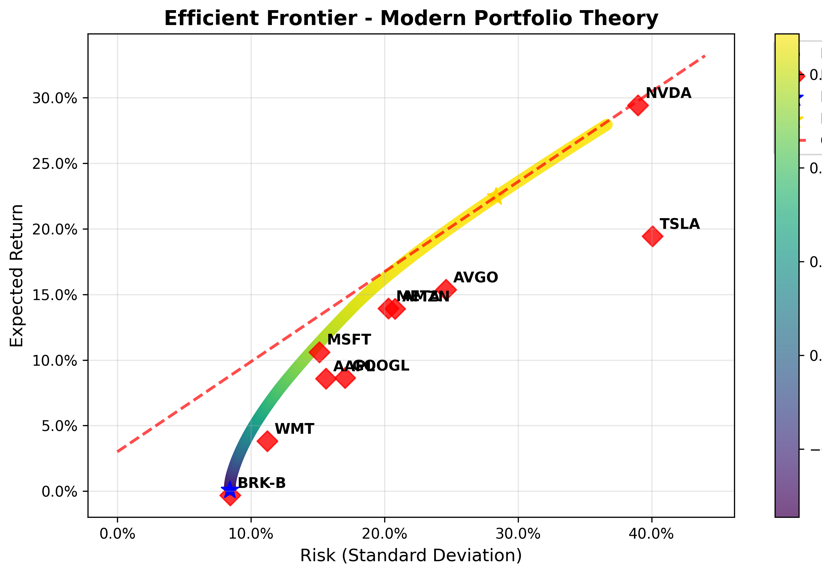


**So the above displays the Efficient Frontier as a ~ solid curve, tough the shape is kind of unusual due to the recent success of Nvidia if we use rebalanceing date = 2025 March 15th for the script, if we exclude it and add let's say 3M (ticker: MMM) we get a more usual shape.**

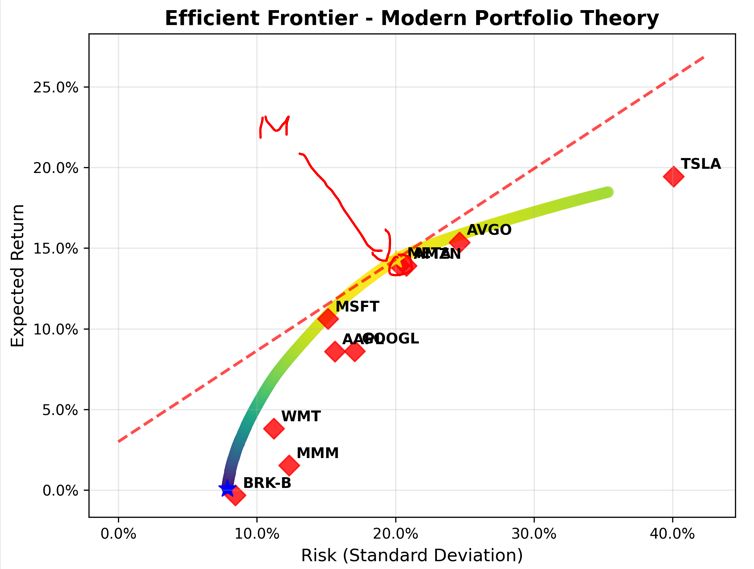

**Now let us introduce the risk free rate and set it equal to 3%! The $r_f$ has no std. deviation, so it lies on the vertical ayis. In the next figure a line is drawn from where $E(R) = r_f = 3%$ to the efficient frontier at point $M$ that I drawn in very professionally in Snipping Tool**



**Point M is the basket of the portfolio called 'Tangency Portfolio'**


## Tangency Portfolio


**The tangency portfolio is the unique combination of risky assets that maximizes the Sharpe ratio. It is the point where the efficient frontier is tangent to the Capital Market Line (CML). This portfolio offers the highest expected excess return per unit of risk, relative to the risk-free rate.**

Key Properties:

    Maximizes the Sharpe ratio (risk-adjusted return)

    Represents the optimal risky portfolio for all investors in the CAPM world

    When combined with the risk-free asset, any point on the CML can be achieved

Mathematical Definition:
$$
\mathbf{w}^* = \frac{\Sigma^{-1} (\mu - r\mathbf{1})}{\mathbf{1}^\top \Sigma^{-1} (\mu - r\mathbf{1})}
$$

Where:

$w∗$: vector of optimal tangency portfolio weights

$Σ$: covariance matrix of asset returns

$μ$: vector of expected asset returns

$r$: risk-free rate

$\mathbf{1}$: vector of ones

## Capital Market Line (CML)


**The Capital Market Line is the straight line in risk-return space that starts at the risk-free rate and is tangent to the efficient frontier at the tangency (market) portfolio. It represents all possible combinations of the risk-free asset and the tangency portfolio, offering the best achievable risk-return trade-offs.**

Key Properties:

    Every portfolio on the CML is efficient

    The slope of the CML equals the Sharpe ratio of the market (tangency) portfolio

    Investors can achieve any risk/return combination on the CML by mixing the risk-free asset and the tangency portfolio

Mathematical Formula:
$$
E(Rp)=r + (E(Rm)−r)/σm⋅σp
$$

Where:

$E(Rp)$: expected return of the portfolio

$r$: perceived risk-free rate

$E(Rm)$: expected return of the market (tangency) portfolio

$σm$: standard deviation of market returns

$σp$: standard deviation (risk) of the portfolio
